In [51]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings

warnings.filterwarnings("ignore")

In [53]:
df = pd.read_csv("student_habits_performance.csv")

df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# Keşifsel Veri Analizi

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [58]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [60]:
df["gender"] = df["gender"].replace({"Female":"Kadın", "Male":"Erkek", "Other":"Diğer"})
df["part_time_job"] = df["part_time_job"].replace({"Yes":"Evet", "No":"Hayır"})

In [89]:
sayisallar = ["age", "study_hours_per_day", "social_media_hours", 
              "netflix_hours", "attendance_percentage", "sleep_hours"]

etiketler = ["Yaş","Çalışma (saat)","Sosyal Medya (saat)",
             "Netflix (saat)","Derse Katılma (%)","Uyku (saat)"]

In [91]:
df.head(2)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,age_group
0,S1000,23,Kadın,0.0,1.2,1.1,Hayır,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,23-24
1,S1001,20,Kadın,6.9,2.8,2.3,Hayır,97.3,4.6,Good,6,High School,Average,8,No,100.0,19-20


# Grafikler

## Dağılım Grafikleri

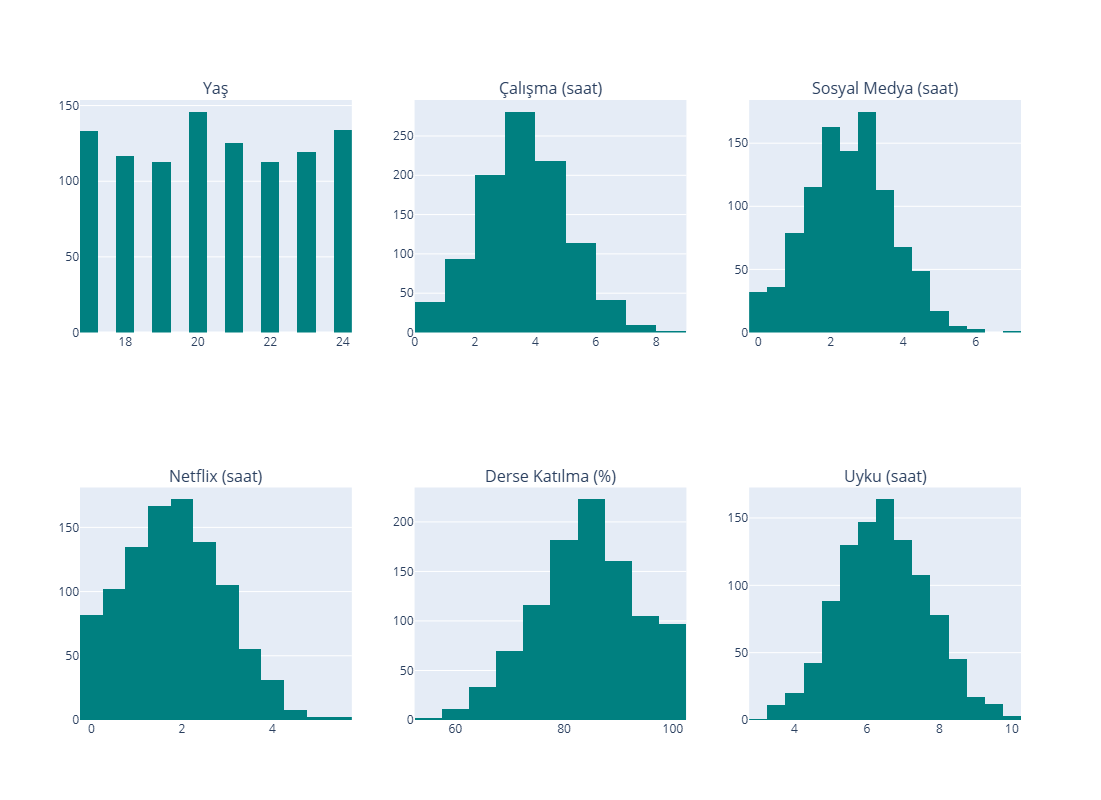

In [100]:
fig = make_subplots(rows=2, cols=3, subplot_titles=etiketler)
row_col = [(1,1),(1,2),(1,3),(2,1),(2,2),(2,3)]

for i, col in enumerate(sayisallar):
    r, c = row_col[i]
    hist = go.Histogram(x=df[col], nbinsx=15, name=etiketler[i], marker_color="teal")
    fig.add_trace(hist, row=r, col=c)

fig.update_layout(
    title_text="",
    width=1100, height=800,
    showlegend=False
)

fig.show()

## Sayısal ve Kategorik Veriler

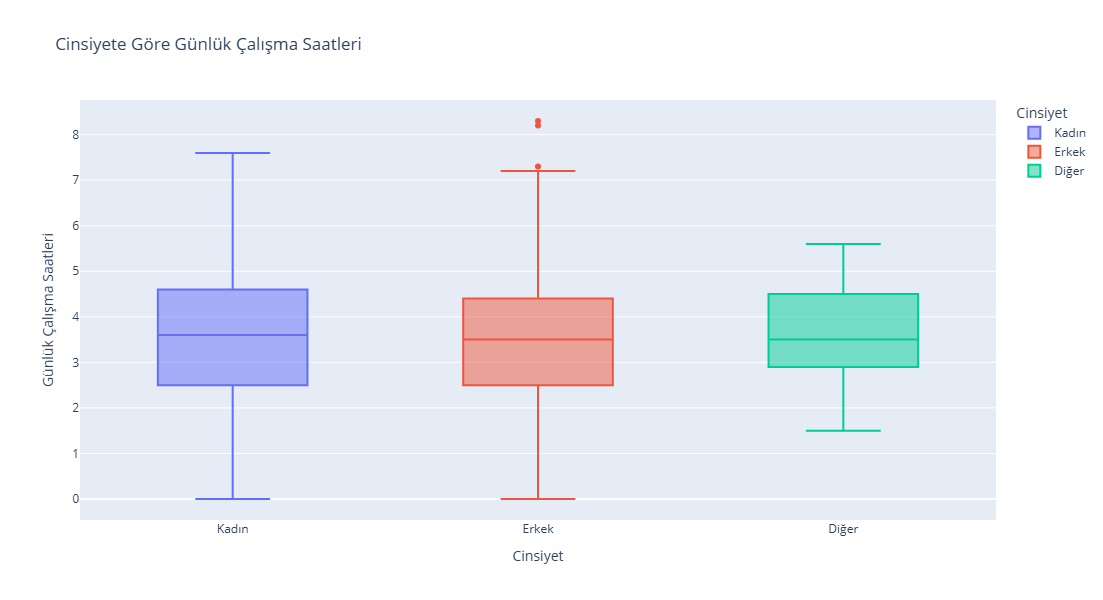

In [124]:
px.box(
    df, x="gender", y="study_hours_per_day",
    color = "gender", category_orders={"gender": ["Kadın","Erkek","Diğer"]},
    title="Cinsiyete Göre Günlük Çalışma Saatleri",
    labels={"gender":"Cinsiyet","study_hours_per_day":"Günlük Çalışma Saatleri"},
    width=800, height=600
).show()

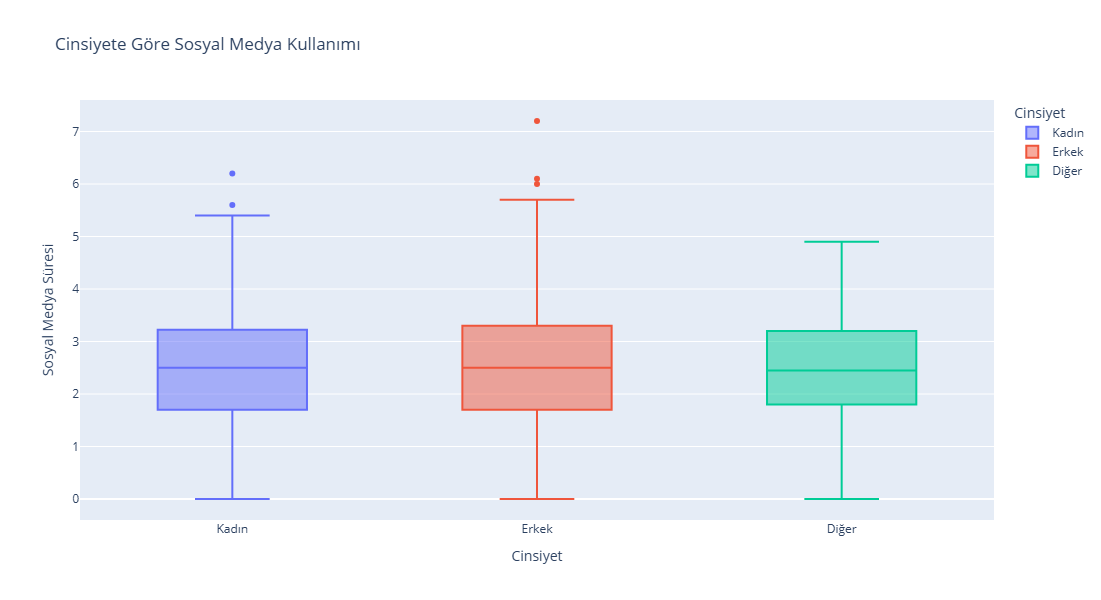

In [126]:
px.box(
    df, x="gender", y="social_media_hours",
    color = "gender", category_orders={"gender": ["Kadın","Erkek","Diğer"]},
    title="Cinsiyete Göre Sosyal Medya Kullanımı",
    labels={"gender":"Cinsiyet","social_media_hours":"Sosyal Medya Süresi"},
    width=800, height=600
).show()

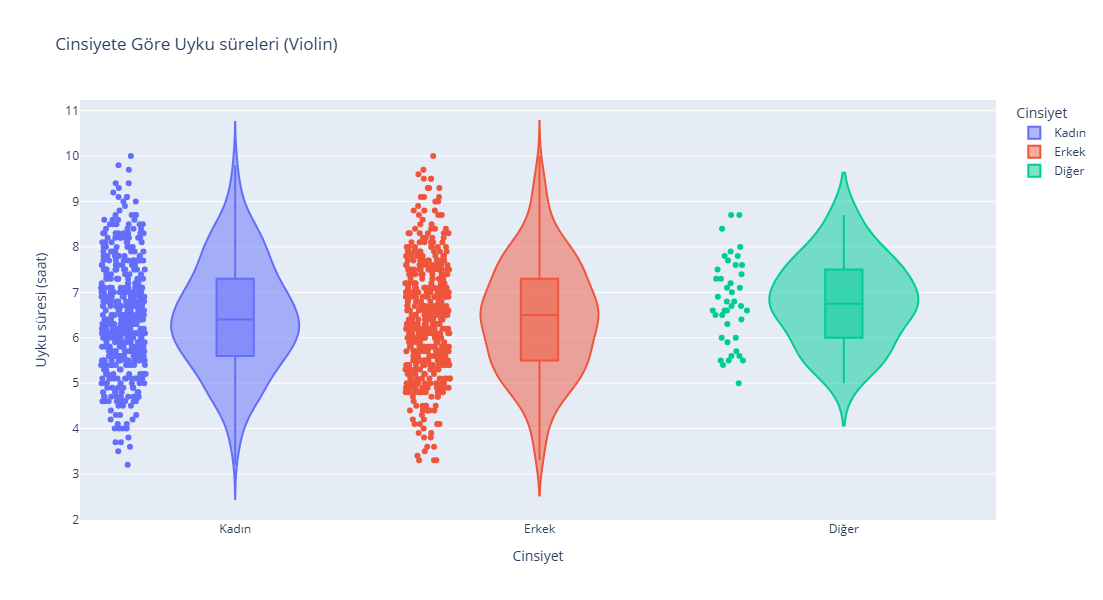

In [130]:
px.violin(
    df, x="gender", y="sleep_hours", points="all", box=True,
    color = "gender", category_orders={"gender": ["Kadın","Erkek","Diğer"]},
    title="Cinsiyete Göre Uyku süreleri (Violin)",
    labels={"gender":"Cinsiyet","sleep_hours":"Uyku süresi (saat)"},
    width=800, height=600
).show()

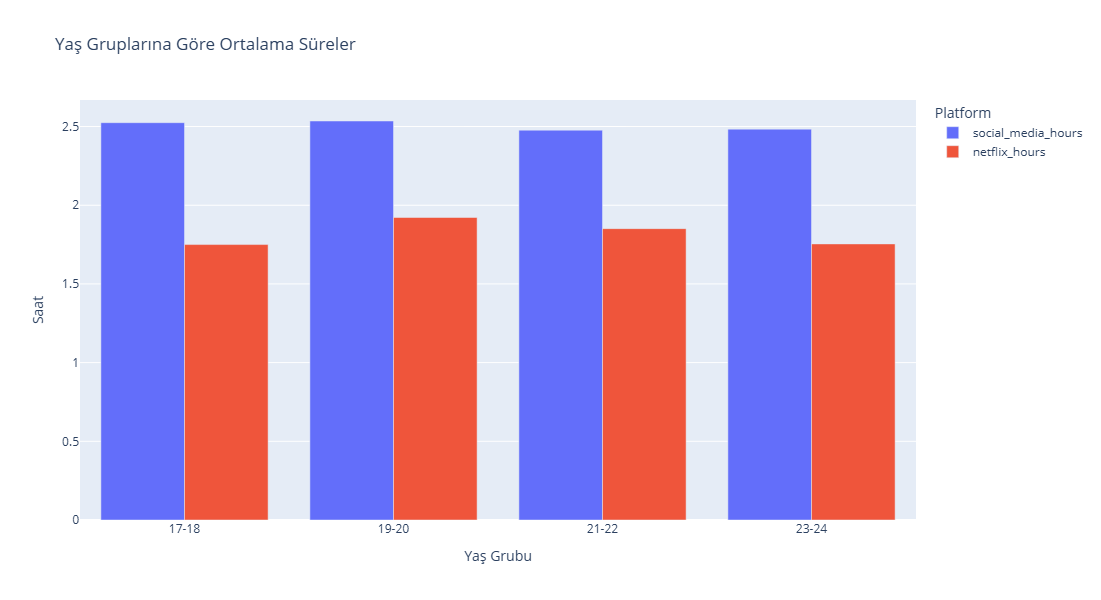

In [138]:
df["age_group"] = pd.cut(df["age"], bins=[16,18,20,22,24],labels=["17-18","19-20","21-22","23-24"])

avg_usage = df.groupby("age_group")[["social_media_hours","netflix_hours"]].mean().reset_index()

fig = px.bar(
    avg_usage, x="age_group", y=["social_media_hours","netflix_hours"],
    labels={"value":"Saat","age_group":"Yaş Grubu","variable":"Platform"},
    title="Yaş Gruplarına Göre Ortalama Süreler",
    width=800, height=600,
    barmode="group"
).show()

## Isı Haritası (Heatmap)

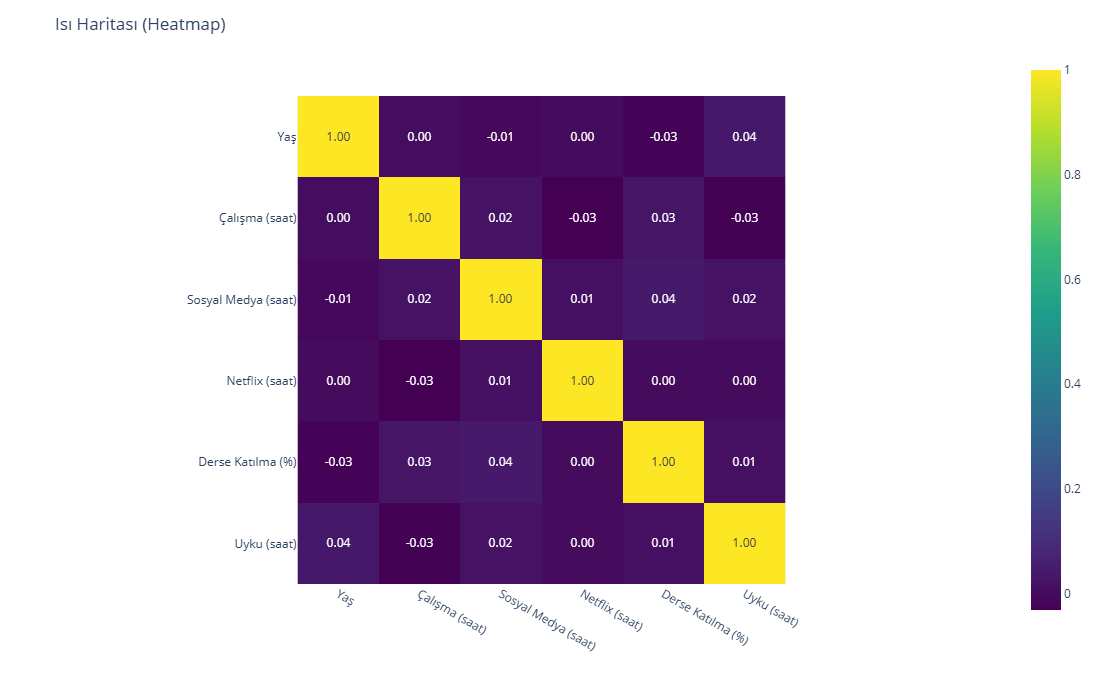

In [161]:
corr = df[sayisallar].corr().fillna(0)
fig = px.imshow(corr, color_continuous_scale="Viridis", text_auto="0.2f",
               x=etiketler, y=etiketler, width=700, height=700)
fig.update_layout(title="Isı Haritası (Heatmap)")
fig.show()